# Librerías


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as img

# 1) Ejemplos básicos

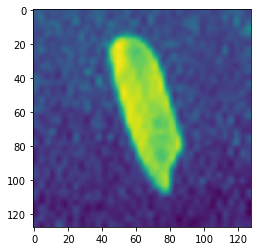

In [36]:
I = cv.imread('rice64.png',0)
plt.axis('off')
plt.imshow(I,cmap='gray')

## 1.1) Máscara promedio (Filtro Pasa Bajos)

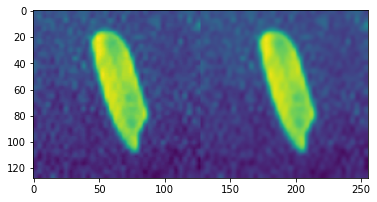

In [34]:
n   = 3
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
Z = np.concatenate((I,L),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')

## 1.2) Máscara Gaussiana (Filtro Pasa Bajos)

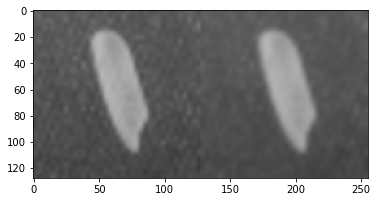

In [7]:
kernel = cv.getGaussianKernel(11, 1.5)         # Gaussian 11 x 1  (11 = size, 1.5 = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian 11 x 11
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')

## 1.2) Bordes horizontales

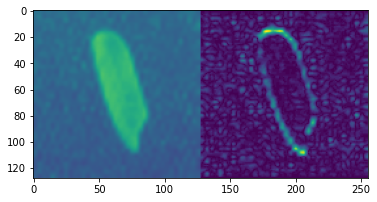

In [10]:
Id = I.astype(float)

# 3x3 Y-direction  kernel
My = np.array([[ 0, -1,  0], [0, 0, 0], [0, 1, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gy0 = cv.filter2D(Id, -1, My)

# Solo para visualización
Gy = np.abs(Gy0)
Gy = Gy/np.max(Gy)*255


Z = np.concatenate((Id,Gy),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')


## 1.3) Bordes verticales

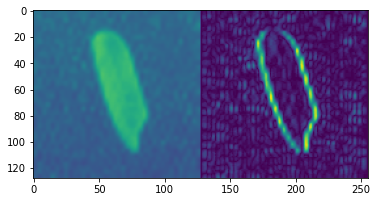

In [12]:
Id = I.astype(float)

# 3 X 3 X-direction kernel
Mx = np.array([[ 0, 0, 0], [-1, 0, 1], [ 0, 0, 0]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
Gx0 = cv.filter2D(Id, -1, Mx)

Gx = np.abs(Gx0)
Gx = Gx/np.max(Gx)*255

Z = np.concatenate((Id,Gx),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')


## 1.4) Ambos bordes 

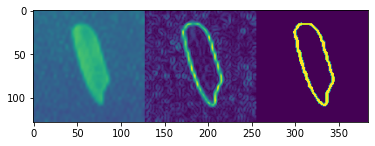

In [13]:
G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')

## 1.5) Sobel (detector de bordes)

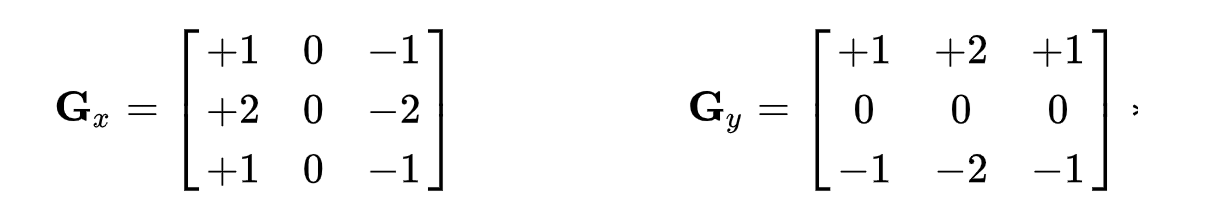

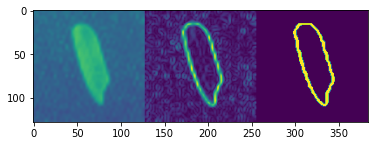

In [14]:
Gx0 = cv.Sobel(Id,cv.CV_64F,1,0,ksize=3)
Gy0 = cv.Sobel(Id,cv.CV_64F,0,1,ksize=3)

G = np.sqrt(np.multiply(Gx0,Gx0) + np.multiply(Gy0,Gy0))
G = np.abs(G)
G = G/np.max(G)*255
E = (G>125)*255

Z = np.concatenate((Id,G,E),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')

# 2) Filtro Pasa Altos

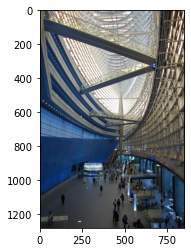

In [16]:
# Lectura de imagen
Icv = cv.imread('tokio_color.jpg')
plt.axis('off')
plt.imshow(Icv)

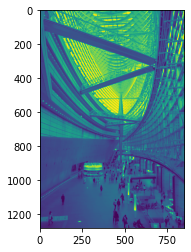

In [17]:
# Conversión a gris
I = cv.cvtColor(Icv, cv.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(I,cmap='gray')

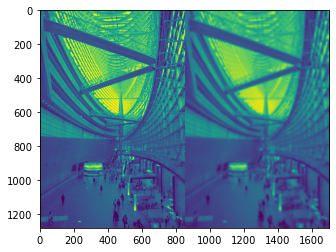

In [18]:
# Filtro Gaussiano
s      = 39
kernel = cv.getGaussianKernel(s, s/8.5)        # Gaussian s x 1  (s = size, s/8.5 = sigma)
window = np.outer(kernel, kernel.transpose())   # Gaussian s x s pixels
L      = cv.filter2D(I,-1,window)
Z      = np.concatenate((I,L),axis=1)
plt.axis('off')
plt.axis('off')
plt.imshow(Z,cmap='gray')

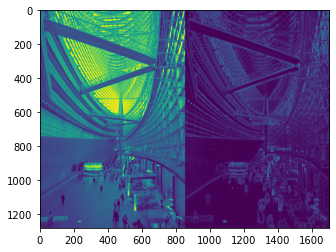

In [19]:
# Pasa Altos
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

# Solo visualizacion
H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
Z = np.concatenate((I,H),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')



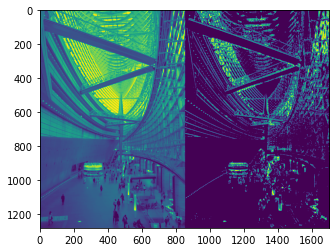

In [20]:
# Detección de bordes
E = (H>50)*255
Z = np.concatenate((I,E),axis=1)
plt.axis('off')
plt.imshow(Z,cmap='gray')



# 3) Filtro Agudizado

Resalta detalles

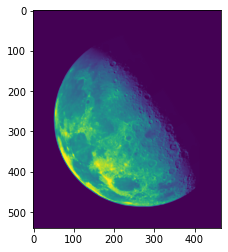

In [38]:
# Imagen Original
I = cv.imread('moon.tif',0)
plt.axis('off')
plt.imshow(I,cmap='gray')

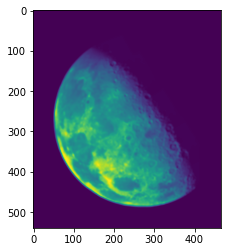

In [40]:
# Imagen Filtrada (pasa bajos)
n   = 5
Mk  = np.ones((n,n),np.float32)/n/n
L   = cv.filter2D(I,-1,Mk)
plt.axis('off')
plt.imshow(L,cmap='gray')

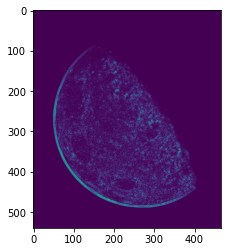

In [41]:
# Pasa Altos
Id = I.astype(float)
Ld = L.astype(float)
Hd = Id-Ld

H = np.abs(Hd)
H = H-np.min(H)
H = H/np.max(H)*255
plt.axis('off')
plt.imshow(H,cmap='gray')



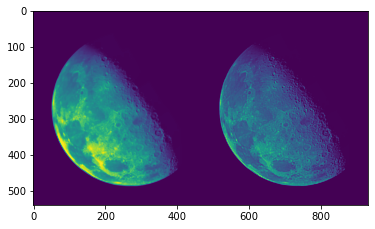

In [42]:
# Agudizacion: se resaltan los pixeles del pasa altos
Jd = Id + 3*Hd

Jd[Jd<0] = 0
Jd = Jd/np.max(Jd)*255

Z = np.concatenate((Id,Jd),axis=1)

plt.axis('off')
plt.imshow(Z,cmap='gray')